# Phase 1

## Import Modules and Load csv File

In [79]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cancerdf = pd.read_csv('Breast-Cancer-Wisconsin.csv')

## Impute missing values 

In [80]:
cancerdf.A7 = cancerdf.A7.replace('?',np.NaN)

Convert Column A7 to numeric value and count null values

In [81]:
s = pd.Series(cancerdf.A7)
cancerdf.A7 = pd.to_numeric(s)
print("The number of NaN:", s.isnull().sum())

The number of NaN: 16


Fill null values with the mean of the column

In [82]:
cancerdf = cancerdf.fillna(cancerdf.mean(skipna=True))

## Compute Data Statistics 

Use describe() method to compute mean, standard deviation, percentiles, min and max

In [83]:
cancerdf.describe()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Report the number of row, columns and unique id values 

In [84]:
print("The number of rows is:",cancerdf.shape[0])
print("The number of columns is:", cancerdf.shape[1])
print("The number of unique ID values is:",len(cancerdf.Scn.unique()))

The number of rows is: 699
The number of columns is: 11
The number of unique ID values is: 645


## Plot Basic Graphs

Draw the histograms for columns A2 through A10

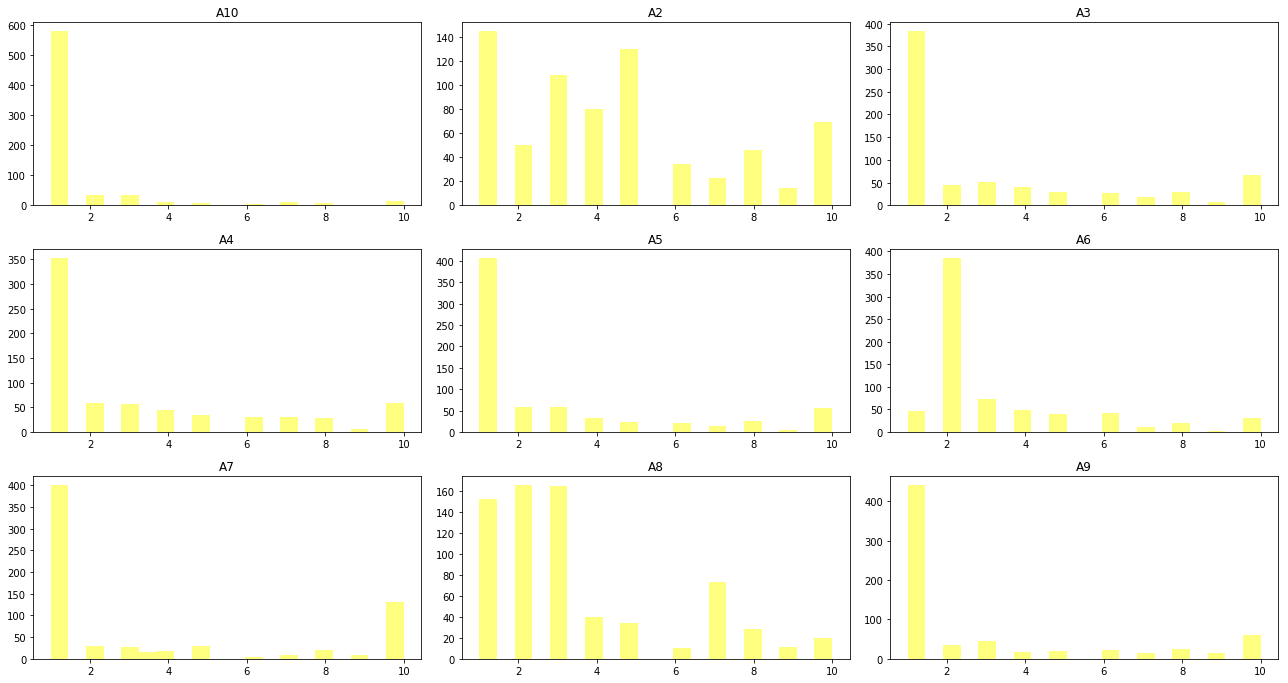

In [85]:
df=cancerdf.loc[:,"A2":"A10"]
df.hist(bins=20, color="yellow", alpha=0.5, figsize=(15,8), grid=False)
plt.tight_layout(rect=(0,0,1.2,1.2))

Draw a bar plot for CLASS

Text(0,0.5,'Count')

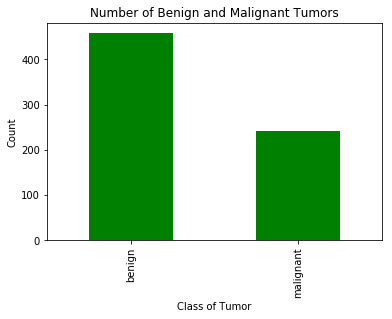

In [86]:
df1=cancerdf.CLASS.value_counts()
sp=df1.plot.bar(color = 'green')
sp.set_xticklabels(["benign","malignant"])
sp.set_title('Number of Benign and Malignant Tumors')
sp.set_xlabel('Class of Tumor')
sp.set_ylabel('Count')

Draw a scatterplot of any two columns

Text(0,0.5,'Uniformity of Cell Shape')

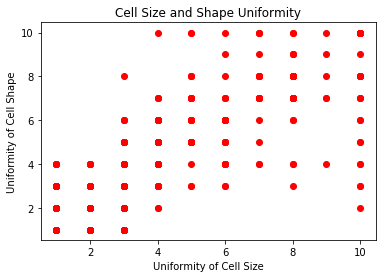

In [87]:
x=cancerdf.A3
y=cancerdf.A4
plt.scatter(x,y,color='r')
plt.title('Cell Size and Shape Uniformity')
plt.xlabel('Uniformity of Cell Size')
plt.ylabel('Uniformity of Cell Shape')

In summary, columns A3 (Uniformity of Cell Size), A7 (Bare Nuclei) and A9 (Normal Nuclei) had the highest standard deviations with values exceeding 3. Higher standard deviations indicate that the values are spread out from the mean for those particular columns. Columns A3, A7 and A9 have more variation in their data.

# Phase 2

## Use KMeans Algorithm

Continue working with cleaned data using only columns A2 through A10

In [88]:
from sklearn.cluster import KMeans

df=cancerdf.loc[:,"A2":"A10"]
print(df)

     A2  A3  A4  A5  A6         A7  A8  A9  A10
0     5   1   1   1   2   1.000000   3   1    1
1     5   4   4   5   7  10.000000   3   2    1
2     3   1   1   1   2   2.000000   3   1    1
3     6   8   8   1   3   4.000000   3   7    1
4     4   1   1   3   2   1.000000   3   1    1
5     8  10  10   8   7  10.000000   9   7    1
6     1   1   1   1   2  10.000000   3   1    1
7     2   1   2   1   2   1.000000   3   1    1
8     2   1   1   1   2   1.000000   1   1    5
9     4   2   1   1   2   1.000000   2   1    1
10    1   1   1   1   1   1.000000   3   1    1
11    2   1   1   1   2   1.000000   2   1    1
12    5   3   3   3   2   3.000000   4   4    1
13    1   1   1   1   2   3.000000   3   1    1
14    8   7   5  10   7   9.000000   5   5    4
15    7   4   6   4   6   1.000000   4   3    1
16    4   1   1   1   2   1.000000   2   1    1
17    4   1   1   1   2   1.000000   3   1    1
18   10   7   7   6   4  10.000000   4   1    2
19    6   1   1   1   2   1.000000   3  

Create KMeans model for 4 clusters and fit model to data

In [89]:
samples = df.values
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4)
model.fit(samples)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [90]:
labels = model.predict(samples)
print(labels)

[0 1 0 3 0 2 0 0 0 0 0 0 0 0 2 3 0 0 1 0 1 3 0 3 0 1 0 0 0 0 0 0 3 0 0 0 3
 0 1 1 3 3 2 3 3 0 1 0 0 3 3 0 3 2 1 3 3 3 1 3 3 0 3 3 0 3 0 1 2 0 0 3 0 1
 3 0 0 0 0 0 0 0 0 0 2 3 1 2 0 0 0 0 0 0 0 0 0 0 3 2 3 0 0 0 2 0 1 2 0 1 0
 1 1 2 0 0 0 2 0 0 0 0 2 1 2 0 1 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 2 0 1 3 0 0 1 0 0 0 2 1 0 0 0 0 0 2 3 0 0 0 0 0 2 1 2 0 3 0 1 0 0 0 2 1
 0 2 2 2 0 2 2 0 0 0 0 1 0 0 0 2 1 0 0 0 2 3 0 0 0 2 2 0 2 2 3 0 0 3 0 0 2
 0 1 1 0 1 3 0 2 1 2 3 1 0 0 2 3 2 1 0 0 0 0 0 0 2 1 0 0 0 1 1 2 3 1 0 0 0
 1 1 2 2 1 3 0 1 1 3 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 2 2 0 3 2 0 0 3 1 0 1
 3 0 0 1 3 0 2 0 1 1 0 0 3 0 0 0 3 0 0 3 1 2 0 1 1 0 0 1 0 0 1 0 3 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 2 0 0 0 3 1 0 0 3 2 0 0 0 2 3 1 2 1 0 0 0 0 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 3 0 1 0 1 0 0 0 0 2 0 0 0 2 0 3 0 0 0 0 0 0 1 1 3 0 0 0 1 0 0 0
 0 0 0 0 0 2 0 0 0 2 0 0 1 3 0 0 0 0 0 0 0 3 1 1 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 2 2 0 0 0 2 3 0 0 1 0 

Print centroids (matrix with 4 rows/clusters and 9 columns)

In [91]:
centroids = model.cluster_centers_
print(centroids)

[[2.94493392 1.24449339 1.36563877 1.29295154 2.03964758 1.3514006
  2.06167401 1.20044053 1.07709251]
 [7.23404255 4.85106383 5.04255319 4.86170213 4.11702128 9.38297872
  5.26595745 3.78723404 1.64893617]
 [6.7625     8.3875     8.425      7.75       6.775      9.2125
  7.375      7.7375     3.7875    ]
 [7.46478873 7.02816901 6.67605634 4.1971831  5.53521127 3.45322005
  5.38028169 6.81690141 2.30985915]]


## Find the optimal number of clusters

Calculate inertia: 
    Create a range of 1 to 15.
    Create an empty list for inertias values.
    Use "for" loop to calculate KMeans for each value and append "inertias"       list.

In [92]:
ks = range(1, 15)

inertias = [] 

for k in ks:
    model =KMeans(n_clusters=k) 
    model.fit(samples)    
    inertias.append(model.inertia_)

Plot range and inertia

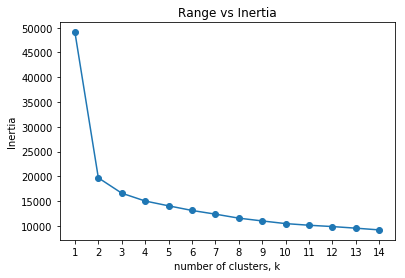

In [93]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range vs Inertia')
plt.xticks(ks)
plt.show()

The optimal number of clusters is determined by choosing an "elbow" in the inertia plot, or specificaly, the point where the inertia begins to decrease more slowly. The inertia appears to decrease more slowly at 2 in the plot shown above, therefore, 2 would be the ideal number of clusters.

## Revise data variation

Apply standard deviation function for columns A2 through A10

In [94]:
df_std=df.std()
print(df_std)

A2     2.815741
A3     3.051459
A4     2.971913
A5     2.855379
A6     2.214300
A7     3.601852
A8     2.438364
A9     3.053634
A10    1.715078
dtype: float64


Plot standard deviation values in a graphic that displays all nine values and includes the title, legend, ylabel and xlabel.

Text(0,0.5,'Standard Deviation')

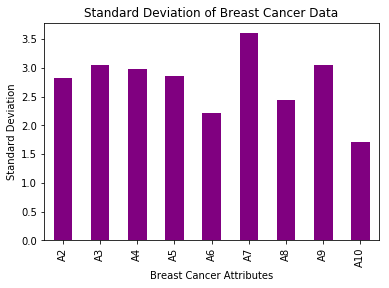

In [95]:
sp=df_std.plot.bar(color = 'purple')
sp.set_title('Standard Deviation of Breast Cancer Data')
sp.set_xlabel('Breast Cancer Attributes')
sp.set_ylabel('Standard Deviation')

## Describe which features have a lot of data variation
Standard deviation is a measure used to quantify the amount of variation or dispersion in a data set. Column A7 has the highest standard deviation, and therefore has the most variation in the data. Column A10 has the lowest standard deviation and the least variation.

## Implement Normalization

Import and use make_pipeline and Standard Scaler, and use n_cluster based on the optimal number of clusters (2) identified above.

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [97]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=2)
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(samples)
labels=pipeline.predict(samples)

Find and print centroids

In [98]:
centroids=kmeans.cluster_centers_
print(centroids)

[[-0.49622257 -0.60690049 -0.60209195 -0.51491746 -0.50971347 -0.5806004
  -0.54770245 -0.53077769 -0.30375822]
 [ 0.98608331  1.20602021  1.19646478  1.02323341  1.01289215  1.1537572
   1.08838307  1.05475054  0.60362211]]
